In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

#TODO explore the buoyancy dataset until you can't
#line plots by selecting 3 dimensions and plotting as a dimension of 4th !!
#heatmaps/colormeshes by selecting two dimemsions are plotting as a function of the other two dimensions !!
#Scatterplots: plot two line plots against each other as a scatter plot !

#make a new notebook and make it organized so that it is a coherent story. you should add notes for analysis. 

#buoyancy average 

In [30]:
dir = "C:\\Users\\aaron\\Documents\\output\\turbulent_h0.8_Ra1.0e9_buoyancy.nc"
ds = xr.open_dataset(dir, decode_times=False)
display(ds)

<xarray.Dataset> Size: 16MB
Dimensions:  (time: 31, zC: 83, yC: 1, xC: 388, zF: 84, yF: 1, xF: 389)
Coordinates:
  * time     (time) float64 248B 0.0 10.0 20.0 30.0 ... 270.0 280.0 290.0 300.0
  * zC       (zC) float64 664B -2.093 -2.067 -2.04 ... 0.04 0.06667 0.09333
  * yC       (yC) float64 8B 1.0
  * xC       (xC) float64 3kB -8.147 -8.105 -8.063 -8.021 ... 8.063 8.105 8.147
  * zF       (zF) float64 672B -2.107 -2.08 -2.053 ... 0.05333 0.08 0.1067
  * yF       (yF) float64 8B 1.0
  * xF       (xF) float64 3kB -8.168 -8.126 -8.084 -8.042 ... 8.084 8.126 8.168
Data variables:
    chi      (time, zC, yC, xC) float64 8MB ...
    b        (time, zC, yC, xC) float64 8MB ...
Attributes:
    Ra:                    1000000000.0
    schedule:              TimeInterval
    interval:              10.0
    Oceananigans:          This file was generated using Oceananigans v0.91.4
    Julia:                 This file was generated using Julia Version 1.11.5...
    output time interval:  Output was saved every 10 seconds.
    date:                  This file was generated on 2025-11-18T12:58:09.570.
    h0:                    0.8

'\nWe can see that if we go to a lower depth represented through the orange line, the buoyancy is lower. We can also observe that the orange line has a more\nsignificant separation where the underwater hills are. This is because the base of the hill is wider than the width higher up. Because of this we can confirm\nthat the orange line is being observed at a depth deeper than the blue line\n'

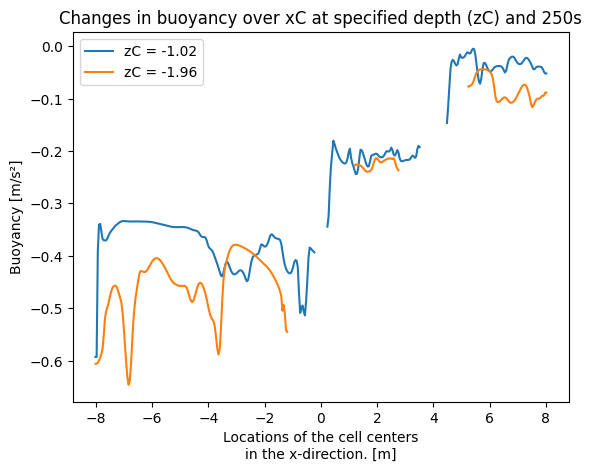

In [ ]:
buoyancy = ds.b 
#Mask the buoyancy values that are 0
buoyancy = buoyancy.where(buoyancy!=0, np.nan)
#buoyancy dimensions = [time, xC, yC, zC]

buoyancyHorizontal = buoyancy[25,40,0,3:-3]
buoyancyHorizontal.plot(label = "zC = -1.02")
'''
At time 250 seconds and a depth of -1.03, buoyancy decreases as it moves to the right along the horizontal direction. This is accurate because in our simulation
the surface of the water on the right was warmer than the left meaning that the water is more buoyant in that region. 
'''
buoyancyHorizontalDeeper = buoyancy[25,5,0,3:-3]
buoyancyHorizontalDeeper.plot(label = "zC = -1.96")
plt.title(f"Changes in buoyancy over xC at specified depth (zC) and 250s")
plt.legend(loc = 'upper left')

'''
We can see that if we go to a lower depth represented through the orange line, the buoyancy is lower. We can also observe that the orange line has a more
significant separation where the underwater hills are. This is because the base of the hill is wider than the width higher up. Because of this we can confirm
that the orange line is being observed at a depth deeper than the blue line
'''
#convenctionally unstable at -3 "rayleigh taylor"

In [105]:
# zC = ds.zC
# zC[10]

xC = ds.xC
xC[10]

<xarray.DataArray 'xC' ()> Size: 8B
array(-7.72631579)
Coordinates:
    xC       float64 8B -7.726
Attributes:
    units:      m
    long_name:  Locations of the cell centers in the x-direction.

'\nFigure 2:\nUsually buoyancy would decrease as depth increases but in this case the surface is less buoyant. This is most likely due to the concentrated cold water plumes\nat the surface at this horizontal position. There is barely any differencce even at 200s except that the buoyancy is lower at deeper waters. \n'

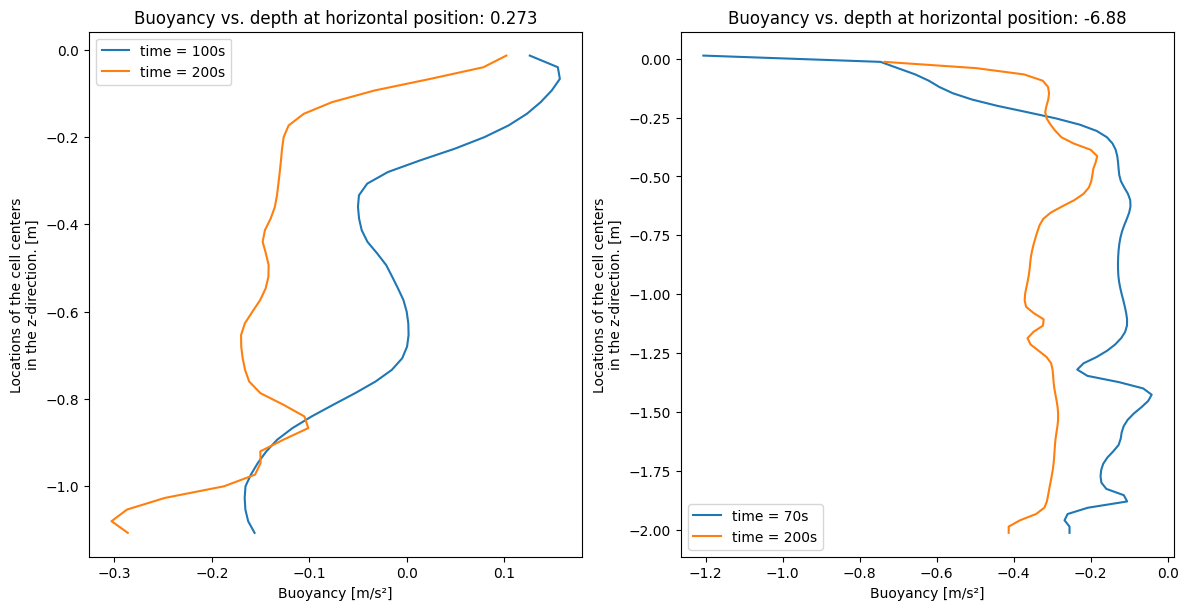

In [26]:
plt.figure(figsize=(14,15))
plt.subplot(2,2,1)
buoyancyDepth = buoyancy[10,3:-4,0,200]
buoyancyDepth.plot(y="zC", label = "time = 100s")


buoyancyDepth_T = buoyancy[20,3:-4,0,200]
buoyancyDepth_T.plot(y="zC", label = "time = 200s")

plt.title("Buoyancy vs. depth at horizontal position: 0.273")
plt.legend(loc="best")

plt.subplot(2,2,2)
buoyancyD = buoyancy[7,3:-3,0,30]
buoyancyD.plot(y="zC", label = "time = 70s")
buoyancyD_T = buoyancy[20,3:-4,0,30]
buoyancyD_T.plot(y="zC", label = "time = 200s")

plt.title("Buoyancy vs. depth at horizontal position: -6.88")
plt.legend(loc="best")
'''
Figure 1:
When the horizontal position is in between the two underwater hills, there is a clear buoyancy discrepancy between the two lines as blue line represents when
time is at 100s and the orange line represents time when it is at 200s. At 100s the buoyancy is higher because the cold plumes have not convected to that 
region. However at 200s, we can see that there is a stark drop in buoyancy from the orange line because the cold plumes have already reached at this horizontal 
position at this point. 
'''
'''
Figure 2:
Usually buoyancy would decrease as depth increases but in this case the surface is less buoyant. This is most likely due to the concentrated cold water plumes
at the surface at this horizontal position. There is barely any differencce even at 200s except that the buoyancy is lower at deeper waters. 
'''
#plot depth on the y axis

In [47]:
zC = ds.zC
zC[30]

# xC = ds.xC
# xC[230]

<xarray.DataArray 'zC' ()> Size: 8B
array(-1.29333333)
Coordinates:
    zC       float64 8B -1.293
Attributes:
    units:      m
    long_name:  Locations of the cell centers in the z-direction.

'\nThe orange line represents the deep water region in between the hills and we can see that buoyancy decreases because the cold waters eventually travels to it \npassing the first hill. For the blue line we can see that buoyancy is initially low because of the initial surge in cold water plumes but then equilibriates \nthe cold water moves to the right. The blue line has a noticeably lower buoyancy than the orange line because that water region is usually always cold. \n'

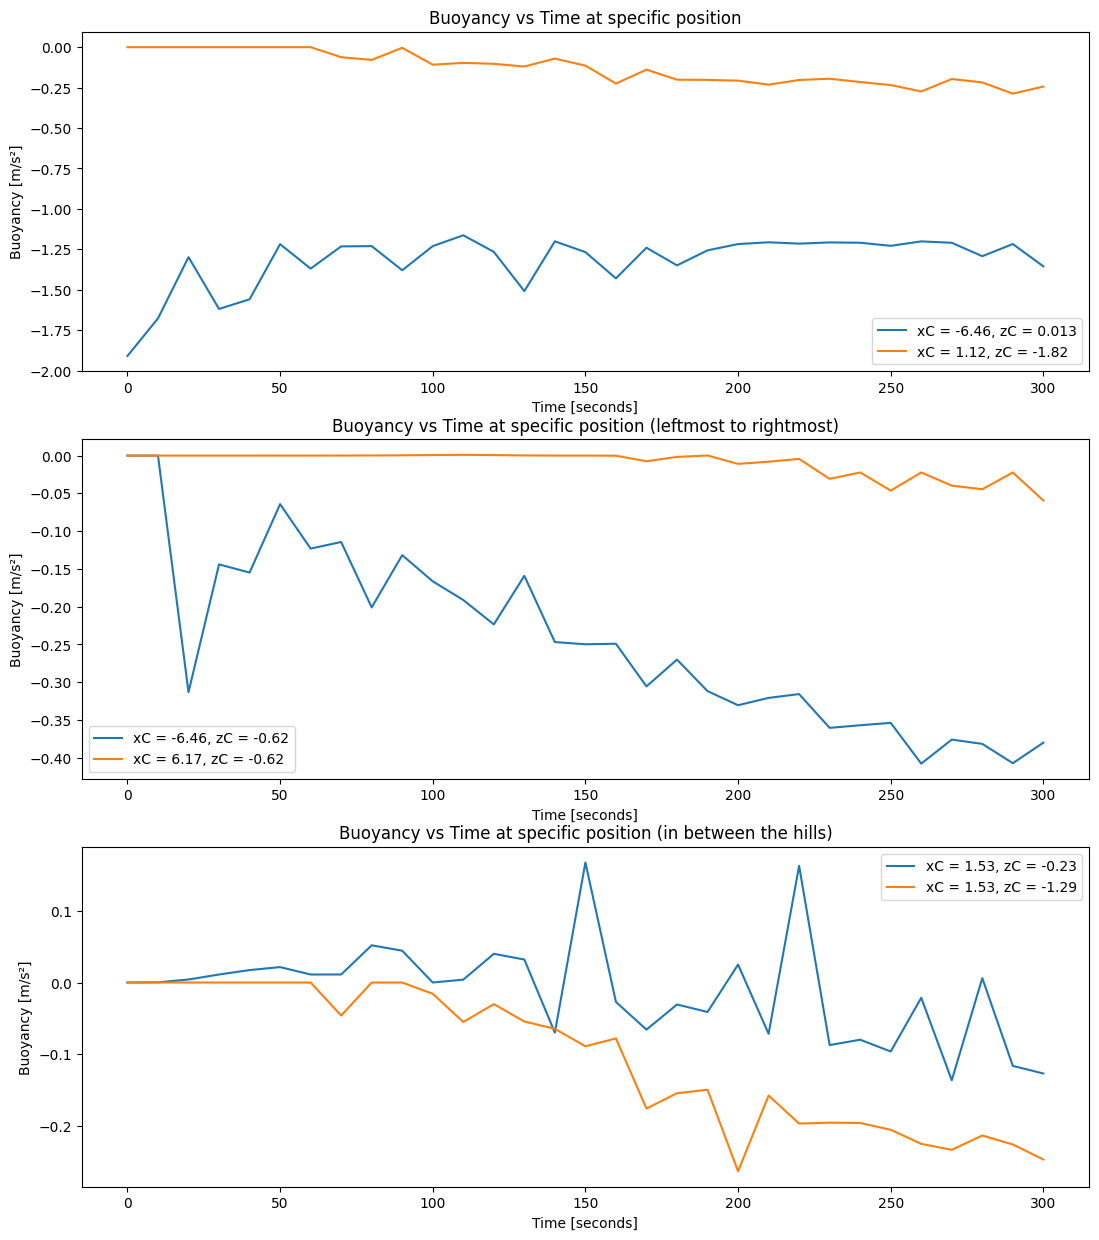

In [ ]:
plt.figure(figsize=(13,15))
plt.subplot(3,1,1)
buoyancyTime_nearSurface_left = buoyancy[:,79,0,40]
buoyancyTime_nearSurface_left.plot(label = "xC = -6.46, zC = 0.013")

buoyancyTime_deeper = buoyancy[:,10, 0, 220]
buoyancyTime_deeper.plot(label = "xC = 1.12, zC = -1.82")
plt.title("Buoyancy vs Time at specific position")
plt.legend(loc="best")

plt.subplot(3,1,2)
buoyancyTime_left = buoyancy[:,55,0,40]
buoyancyTime_left.plot(label = "xC = -6.46, zC = -0.62")
buoyancyTime_right = buoyancy[:,55,0,340]
buoyancyTime_right.plot(label = "xC = 6.17, zC = -0.62")
plt.legend(loc="best")
plt.title("Buoyancy vs Time at specific position (leftmost to rightmost)")

plt.subplot(3,1,3)
buoyancyTime_left = buoyancy[:,70,0,230]
buoyancyTime_left.plot(label = "xC = 1.53, zC = -0.23")
buoyancyTime_right = buoyancy[:,30,0,230]
buoyancyTime_right.plot(label = "xC = 1.53, zC = -1.29")
plt.legend(loc="best")
plt.title("Buoyancy vs Time at specific position (in between the hills)")
'''
The orange line represents the deep water region in between the hills and we can see that buoyancy decreases because the cold waters eventually travels to it 
passing the first hill. For the blue line we can see that buoyancy is initially low because of the initial surge in cold water plumes but then equilibriates 
the cold water moves to the right. The blue line has a noticeably lower buoyancy than the orange line because that water region is usually always cold. 
'''
#error for blue line, should not be changing as much initially, 
#compare the leftmost and rightmost
#use f strings to label

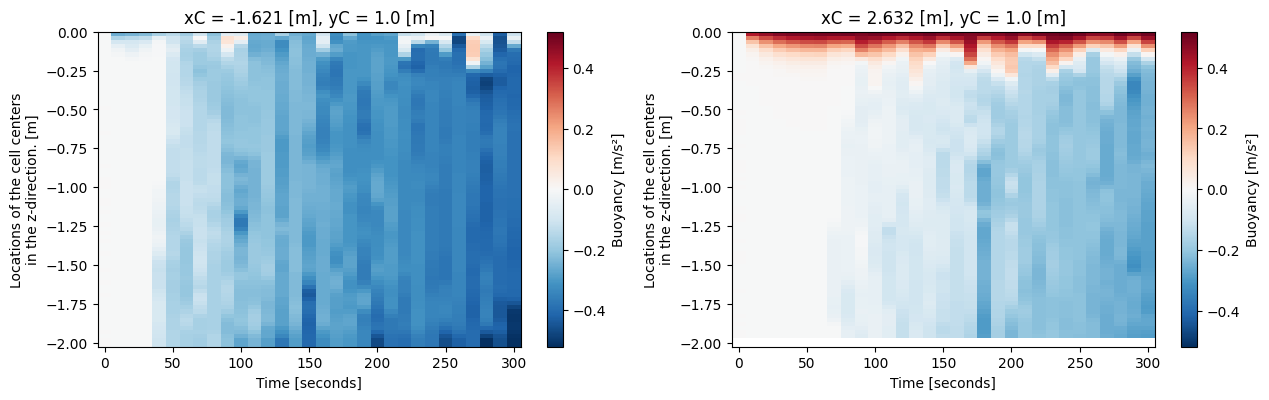

In [ ]:
#heatmaps/colormeshes by selecting two dimemsions are plotting as a function of the other two dimensions !!
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
b_z_t = buoyancy[:,3:-4,0,155]
b_z_t.plot(x="time")

plt.subplot(2,2,2)
b_z_t2 = buoyancy[:,3:-4, 0,256]
b_z_t2.plot(x="time")

#LOOKING AT BUOYANCY AS A FUNCTION DEPTH VS. TIME 
'''
The first figure shows the buoyancy gradient over depth at a horizontal position of -1.621. Initially, buoyancy is near 0 because the convection of the cold 
waters have not started yet, but at 50s the buoyancy starts to decrease as indicated by the blue hue. Depth and buoyancy are directly related in this region 
as the deeper we go the buoyancy decreases. 

In the second figure, already we can see visually that this region takes place more towards the right of the simulation since high buoyancy levels are 
shown near the surface. Only until 75s, the buoyancy levels start to fall due to the cold water convection from the plumes at the start of the simulation. 
Although it is important to note that the surface continues to retain its high buoyancy and does not fluctuate much even with the convecting waters. 
'''
#darker patch indicates eddies in figure 2. (in betweeen hills)

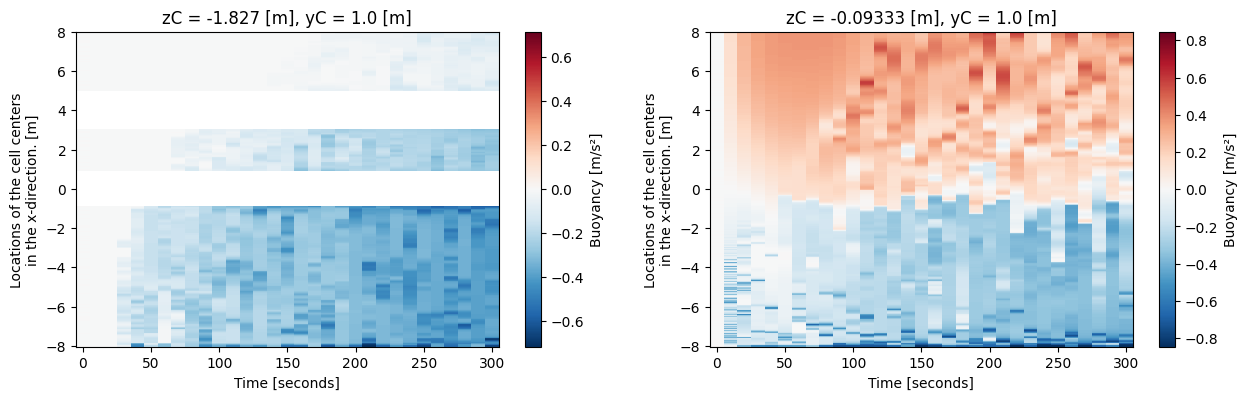

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
b_z_t = buoyancy[:,10,0,3:-4]
b_z_t.plot(x="time")

plt.subplot(2,2,2)
b_z_t2 = buoyancy[:,75, 0,3:-4]
b_z_t2.plot(x="time")

#LOOKING AT BUOYANCY AS A FUNCTION HORIZONTAL POSITION VS. TIME 
'''
When comparing the two heatmaps together, a clear difference is the two blank space in the first figure. These represent the two hills on the seafloor. 

In the Figure 1, because zC is so low, majority of the heatmap was a buoyancy less than 0. This makes sense because colder waters are in deep ocean making
them more dense and thus less buoyant. Noticeably when x is negative (in the left direction), buoyancy is lower than on the right. This directly corresponds 
to the simulation we created because the cold plumes start on the left and the reason why the positive x values have no red hues is because this is looking at
deep waters. 

In Figure however there is more of a direct constrast between red and blue. This takes place near the surface which is why we see high buoyancy at positive x 
and low buoyancy at negative x. As time increases, we can see that mixing starts to occur with the cool and warm water penetrating the other side. 
'''
#longer 

' \nThis is the same as the simulation we watched. When the coldp plumes interacts with the hill, we can see that much of the water creates an eddie causing it \ncirculate back while only a small amount moves past the apex of the hill. After 200s, we can see a higher concentration of cold water have entered the region\nfrom the lower levels of buoyancy. We can see that it took 150s for the water to begin moving up the second hill. Because it is taller than the first, it will\nbe harder for the water to move past. \n\nIn an idealized simulation, we can observe that obstacles such as these hill heavily hinder the movement of circulation decreasing the rate of convection however\nin return creates more small scale circulations or eddies. These features cause more turbulence within our ocean waters driving processes such as waves. \n'

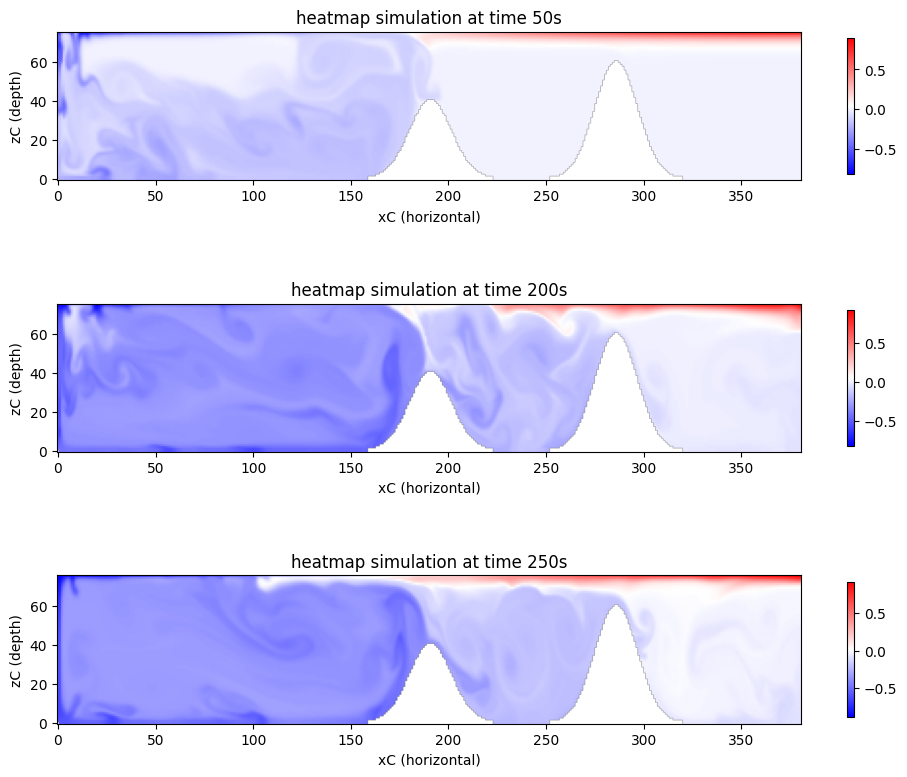

In [41]:
b_tzx = buoyancy[:,3:-4,0,3:-4]
b_tzx.sizes
#{'time': 31, 'zC': 76, 'xC': 381}

#HEATMAP FOR VISUALIZATION
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
plt.imshow(b_tzx[5,:,:], cmap='bwr', origin="lower")
plt.title("heatmap simulation at time 50s")
plt.xlabel("xC (horizontal)")
plt.ylabel("zC (depth)")
plt.colorbar(shrink=0.6)
plt.show

plt.subplot(3,1,2)
plt.imshow(b_tzx[20,:,:], cmap='bwr', origin="lower")
plt.title("heatmap simulation at time 200s")
plt.xlabel("xC (horizontal)")
plt.ylabel("zC (depth)")
plt.colorbar(shrink=0.6)
plt.show

plt.subplot(3,1,3)
plt.imshow(b_tzx[25,:,:], cmap='bwr', origin="lower")
plt.title("heatmap simulation at time 250s")
plt.xlabel("xC (horizontal)")
plt.ylabel("zC (depth)")
plt.colorbar(shrink=0.6)
plt.show

''' 
This is the same as the simulation we watched. When the coldp plumes interacts with the hill, we can see that much of the water creates an eddie causing it 
circulate back while only a small amount moves past the apex of the hill. After 200s, we can see a higher concentration of cold water have entered the region
from the lower levels of buoyancy. We can see that it took 150s for the water to begin moving up the second hill. Because it is taller than the first, it will
be harder for the water to move past. 

In an idealized simulation, we can observe that obstacles such as these hill heavily hinder the movement of circulation decreasing the rate of convection however
in return creates more small scale circulations or eddies. These features cause more turbulence within our ocean waters driving processes such as waves. 
'''

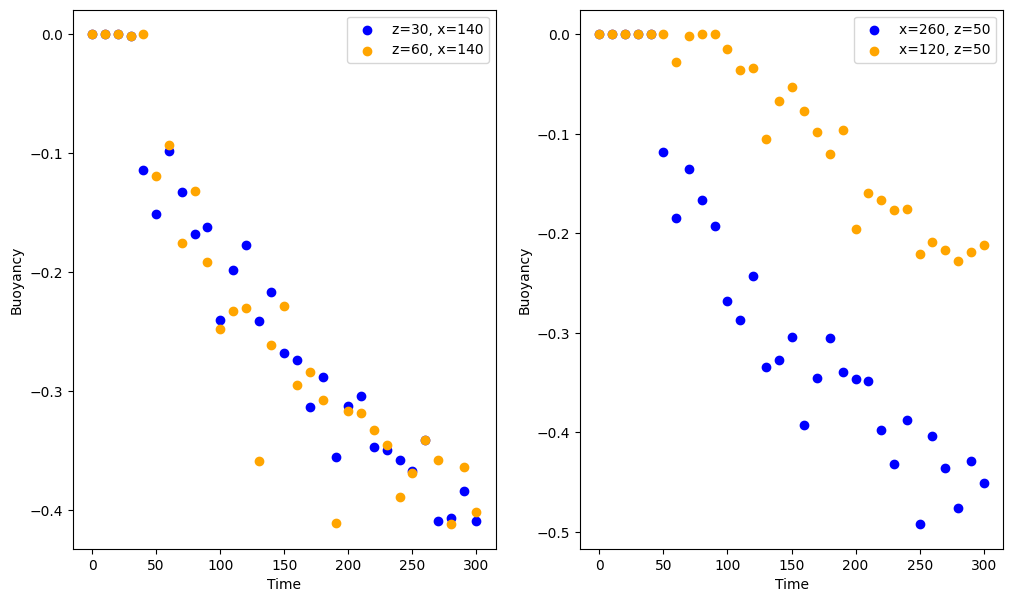

'\n\n'

In [52]:

#Scatterplots: plot two line plots against each other as a scatter plot !
time = ds.time
buotime1 = buoyancy[:,30,0,140]
buotime2 = buoyancy[:,60,0,140]

buotime3 = buoyancy[:,30,0,180]
buotime4 = buoyancy[:,30,0,220]

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.scatter(time, buotime1, color='blue', label='z=30, x=140')
plt.scatter(time, buotime2, color='orange', label='z=60, x=140')
plt.xlabel("Time")
plt.ylabel("Buoyancy")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(time, buotime3, color='blue', label='x=260, z=50')
plt.scatter(time, buotime4, color='orange', label='x=120, z=50')
plt.xlabel("Time")
plt.ylabel("Buoyancy")
plt.legend()
plt.show()
# buotime1 = buoyancy[20,3:-4,0,140]
# buotime2 = buoyancy[25,3:-4,0,270]
# plt.scatter(buotime1, buotime2)
'''

'''

In [151]:
buotime1

<xarray.DataArray 'b' (zC: 76)> Size: 608B
array([-0.45625219, -0.45625219, -0.42649691, -0.38786083, -0.35568815,
       -0.3327704 , -0.32007337, -0.31634729, -0.31770247, -0.32036742,
       -0.32427438, -0.33073846, -0.3377696 , -0.34282664, -0.34672156,
       -0.35305766, -0.3695913 , -0.39296354, -0.40716245, -0.40080104,
       -0.36351348, -0.32386352, -0.29759178, -0.28479982, -0.28259524,
       -0.28954885, -0.30143356, -0.31204791, -0.31745291, -0.31940041,
       -0.32094776, -0.32348654, -0.32761068, -0.3315325 , -0.33357743,
       -0.33438856, -0.33503887, -0.33598106, -0.33782758, -0.34071228,
       -0.34241152, -0.34038494, -0.3390373 , -0.34166502, -0.34368882,
       -0.34028837, -0.33267471, -0.32616892, -0.32244262, -0.32064734,
       -0.31989888, -0.32025728, -0.32159379, -0.32274294, -0.32241813,
       -0.32010524, -0.31818019, -0.31659182, -0.31372935, -0.30528123,
       -0.29067971, -0.28327937, -0.28195943, -0.27934944, -0.28189843,
       -0.30089586, -0.31830023, -0.32406368, -0.32032974, -0.31116203,
       -0.3015503 , -0.29427782, -0.29127315, -0.29049553, -0.28488408,
       -0.29832131])
Coordinates:
  * zC       (zC) float64 608B -2.013 -1.987 -1.96 ... -0.06667 -0.04 -0.01333
    xC       float64 8B -2.253
    yC       float64 8B 1.0
    time     float64 8B 200.0
Attributes:
    units:      m/s²
    long_name:  Buoyancy